## Atividade: Bolsa Família


### Disponível também no repositório https://github.com/Jownao/dive_datascience

* Os dados são compostos por dois arquivos: 
    * A base família - (data_familia_sergipe.csv)
    * A base pessoas - (data_pessoas_sergipe.csv)  
* As bases são desidentificadas, ou seja, não possuem informações que permitam identificar quem são as pessoas. Cada base é composta por uma série de identificadores sócio-econômico das pessoas e famílias. Existe um identificador que permite associar família e pessoas.

Os atributos da base está disponível [aqui](https://github.com/Jownao/dive_datascience/blob/main/datasets/03_bolsa_familia/Dicionario_base_desidentificada_pt.xlsx) (Dicionario_base_desidentificada_pt.xlsx)



## Imports e informações adicionais

In [51]:
# Importação de pacotes necessários para este laboratório

import seaborn as sns #Visualização
import matplotlib.pyplot as plt #Visualização
import pandas as pd #Biblioteca Pandas para os dados
import numpy as np #Biblioteca para trabalhar com números

def convert_sums_frame(sums_object, columns):
    frame_ = pd.DataFrame(sums_object)
    frame_.reset_index(inplace=True)
    frame_.columns = columns

    return frame_

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.0f}%\n({:d})".format(pct, absolute)

### Famílias

In [2]:
# Dados das famílias
dataf = pd.read_csv("../datasets/03_bolsa_familia/data_familia_sergipe.csv")
data_bolsa = dataf.query("marc_pbf == 1")


In [3]:
#df.drop(df.loc[df['line_race']==0].index, inplace=True)
#ataf.loc[dataf['qtd_comodos_domic_fam']==20]

In [4]:
dataf.head()

,cd_ibge,estrato,classf,id_familia,dat_cadastramento_fam,dat_alteracao_fam,vlr_renda_media_fam,dat_atualizacao_familia,cod_local_domic_fam,cod_especie_domic_fam,...,cod_familia_indigena_fam,ind_familia_quilombola_fam,nom_estab_assist_saude_fam,cod_eas_fam,nom_centro_assist_fam,cod_centro_assist_fam,ind_parc_mds_fam,marc_pbf,qtde_pessoas,peso.fam
0,2806206,2,3,183415.0,2006-01-07,2018-09-30,58.0,2018-02-27,1.0,1.0,...,2.0,2.0,P S IVA SALGUEIRO,2421836.0,CRAS CENTRO DE REFERENCIA DA ASSISTENCIA SOCIAL,2.806200e+10,0.0,0,4,550052838636015
1,2803609,2,3,183416.0,2010-03-09,2018-09-30,190.0,2018-07-20,2.0,1.0,...,2.0,2.0,POSTO DE SAUDE RICARDO HAGENBECK,2421380.0,CRAS ANGELA MARIA DE CARVALHO LIMA BOMFIM,2.803602e+10,0.0,0,5,550245146328323
2,2803203,2,3,183417.0,2006-02-25,2018-09-30,100.0,2018-08-21,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550305936601879
3,2805703,2,3,183418.0,2004-05-25,2017-12-15,937.0,2017-11-09,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,0,1,550405659971983
4,2805307,1,3,183419.0,2016-03-31,2018-10-15,25.0,2018-10-15,2.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550245146328323


In [5]:
# Convertendo os atributos para categórico
dataf[['cod_local_domic_fam','cod_especie_domic_fam','cod_material_piso_fam',
'cod_material_domic_fam','cod_agua_canalizada_fam','cod_abaste_agua_domic_fam',
'cod_banheiro_domic_fam','cod_escoa_sanitario_domic_fam','cod_destino_lixo_domic_fam',
'cod_iluminacao_domic_fam','cod_calcamento_domic_fam','cod_familia_indigena_fam',
'ind_familia_quilombola_fam','ind_parc_mds_fam','estrato','classf','marc_pbf']] = dataf[['cod_local_domic_fam','cod_especie_domic_fam','cod_material_piso_fam',
'cod_material_domic_fam','cod_agua_canalizada_fam','cod_abaste_agua_domic_fam',
'cod_banheiro_domic_fam','cod_escoa_sanitario_domic_fam','cod_destino_lixo_domic_fam',
'cod_iluminacao_domic_fam','cod_calcamento_domic_fam','cod_familia_indigena_fam',
'ind_familia_quilombola_fam','ind_parc_mds_fam','estrato','classf','marc_pbf']].astype("category")

# Convertendo os atributos para objeto
dataf[['cod_centro_assist_fam','cod_eas_fam','id_familia','cd_ibge']] = dataf[['cod_centro_assist_fam','cod_eas_fam','id_familia','cd_ibge']].astype("object")



[Text(0, 0, '3'),
 Text(0, 0, '919'),
 Text(0, 0, '2063'),
 Text(0, 0, '4153'),
 Text(0, 0, '13017'),
 Text(0, 0, '42163'),
 Text(0, 0, '12248'),
 Text(0, 0, '2518'),
 Text(0, 0, '774'),
 Text(0, 0, '154'),
 Text(0, 0, '56'),
 Text(0, 0, '18'),
 Text(0, 0, '11'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '1')]

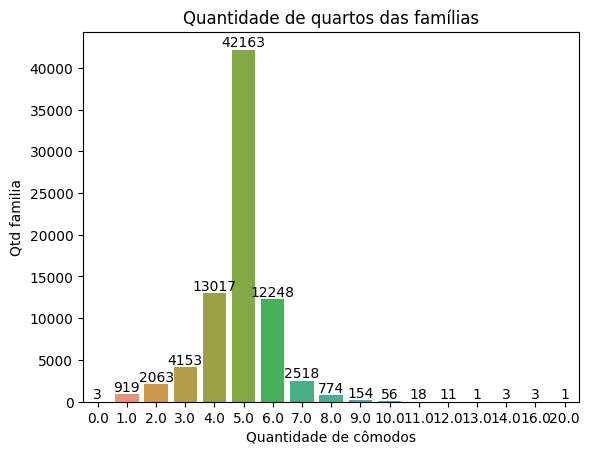

In [54]:
# Comodos x Pessoas / Grande parte possui entre 4-6 cômodos

datatb = dataf.groupby("qtd_comodos_domic_fam")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['qtd_comodos_domic_fam','id_familia'])
datatb = datatb.sort_values(by='qtd_comodos_domic_fam', 
                      ascending=False )
datatb
bar = sns.barplot(data=datatb, x="qtd_comodos_domic_fam",y="id_familia")
bar.set(xlabel='Quantidade de cômodos',ylabel='Qtd familia')
plt.title('Quantidade de quartos das famílias')
bar.bar_label(bar.containers[0])

[Text(0, 0, '2'),
 Text(0, 0, '674'),
 Text(0, 0, '1458'),
 Text(0, 0, '2881'),
 Text(0, 0, '8734'),
 Text(0, 0, '26065'),
 Text(0, 0, '6491'),
 Text(0, 0, '1197'),
 Text(0, 0, '298'),
 Text(0, 0, '48'),
 Text(0, 0, '15'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

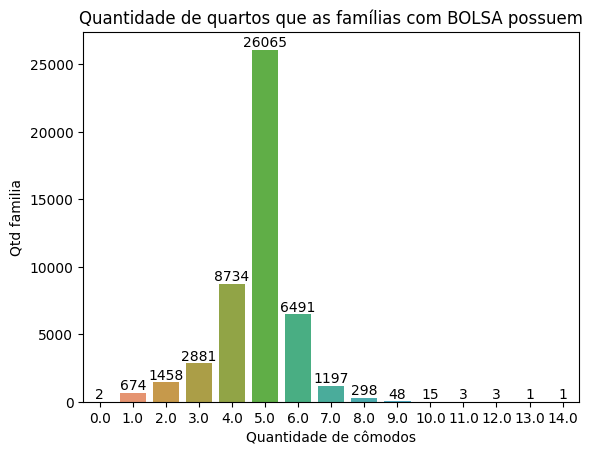

In [7]:
# Comodos x Pessoas / Grande parte possui entre 4-6 cômodos

datatb = data_bolsa.groupby("qtd_comodos_domic_fam")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['qtd_comodos_domic_fam','id_familia'])
datatb = datatb.sort_values(by='qtd_comodos_domic_fam', 
                      ascending=False )
datatb
bar = sns.barplot(data=datatb, x="qtd_comodos_domic_fam",y="id_familia")
bar.set(xlabel='Quantidade de cômodos',ylabel='Qtd familia')
plt.title('Quantidade de quartos que as famílias com BOLSA possuem')
bar.bar_label(bar.containers[0])

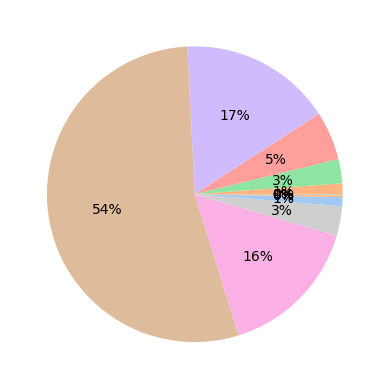

In [8]:
dataf_pie = dataf.groupby("qtd_comodos_domic_fam")["id_familia"].count()
colors = sns.color_palette('pastel')[0:8]
#Grafico de pizza para representar o gráfico acima
plt.pie(dataf_pie, colors = colors, autopct='%.0f%%')
plt.show()

[Text(0, 0, '31708'), Text(0, 0, '50567')]

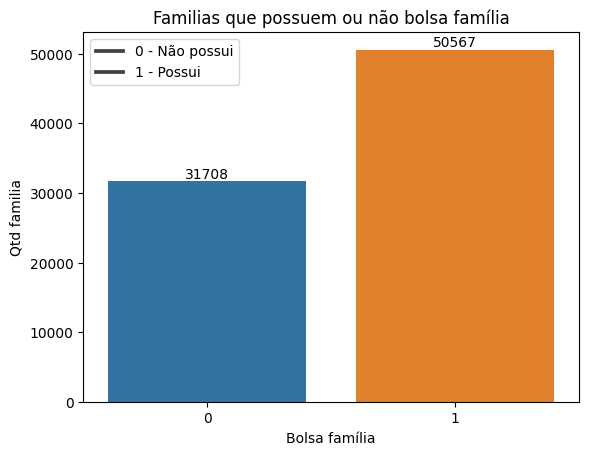

In [9]:
# Familias x Bolsa / 

datatb = dataf.groupby("marc_pbf")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['marc_pbf','id_familia'])
datatb = datatb.sort_values(by='marc_pbf', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="marc_pbf",y="id_familia")
bar.set(xlabel='Bolsa família',ylabel='Qtd familia')
plt.title('Familias que possuem ou não bolsa família')
plt.legend(('0 - Não possui','1 - Possui'))
bar.bar_label(bar.containers[0])

[Text(0, 0, '7'), Text(0, 0, '23')]

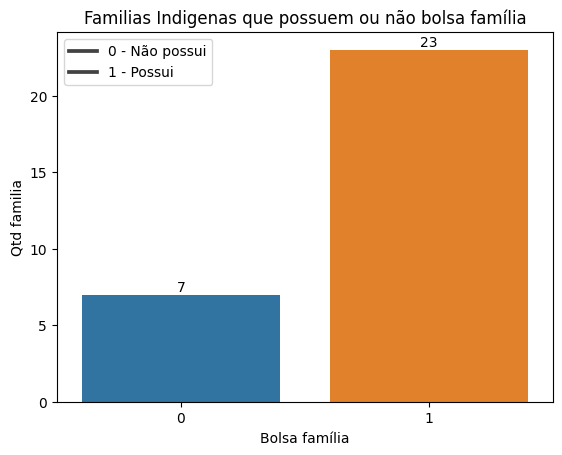

In [10]:
# Familias Indigenas x Bolsa / 
dataIB = dataf.query("cod_familia_indigena_fam == 1")

datatb = dataIB.groupby("marc_pbf")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['marc_pbf','id_familia'])
datatb = datatb.sort_values(by='marc_pbf', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="marc_pbf",y="id_familia")
bar.set(xlabel='Bolsa família',ylabel='Qtd familia')
plt.title('Familias Indigenas que possuem ou não bolsa família')
plt.legend(('0 - Não possui','1 - Possui'))
bar.bar_label(bar.containers[0])

[Text(0, 0, '166'), Text(0, 0, '342')]

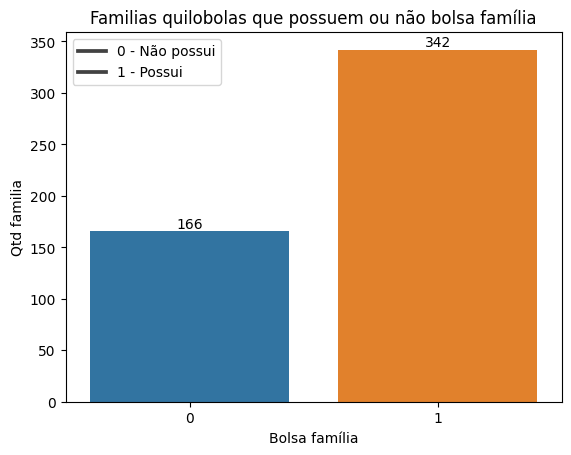

In [11]:
# Familias Quilobolas x Bolsa / 
dataQB = dataf.query("ind_familia_quilombola_fam == 1")

datatb = dataQB.groupby("marc_pbf")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['marc_pbf','id_familia'])
datatb = datatb.sort_values(by='marc_pbf', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="marc_pbf",y="id_familia")
bar.set(xlabel='Bolsa família',ylabel='Qtd familia')
plt.title('Familias quilobolas que possuem ou não bolsa família')
plt.legend(('0 - Não possui','1 - Possui'))
bar.bar_label(bar.containers[0])

[Text(0, 0, '44616'),
 Text(0, 0, '34'),
 Text(0, 0, '7'),
 Text(0, 0, '863'),
 Text(0, 0, '9'),
 Text(0, 0, '49'),
 Text(0, 0, '3189'),
 Text(0, 0, '157'),
 Text(0, 0, '24'),
 Text(0, 0, '28'),
 Text(0, 0, '9'),
 Text(0, 0, '26'),
 Text(0, 0, '404')]

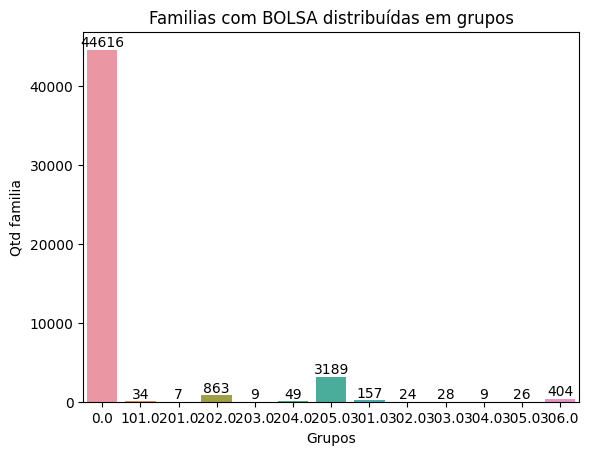

In [12]:
# Familias com bolsa x Grupos / 

datatb = data_bolsa.groupby("ind_parc_mds_fam")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['ind_parc_mds_fam','id_familia'])
datatb = datatb.sort_values(by='ind_parc_mds_fam', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="ind_parc_mds_fam",y="id_familia",errwidth=0)
bar.set(xlabel='Grupos',ylabel='Qtd familia')
plt.title('Familias com BOLSA distribuídas em grupos')
bar.bar_label(bar.containers[0])



[Text(0, 0, '44107'),
 Text(0, 0, '946'),
 Text(0, 0, '1201'),
 Text(0, 0, '184'),
 Text(0, 0, '196'),
 Text(0, 0, '1255')]

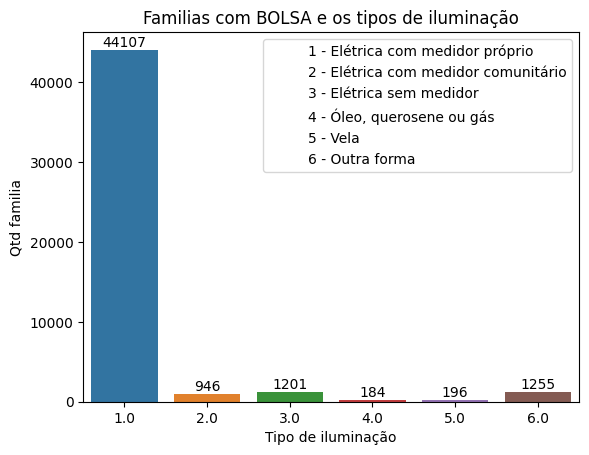

In [13]:
# Familias com bolsa x Tipo de iluminação / 

datatb = data_bolsa.groupby("cod_iluminacao_domic_fam")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['cod_iluminacao_domic_fam','id_familia'])
datatb = datatb.sort_values(by='cod_iluminacao_domic_fam', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="cod_iluminacao_domic_fam",y="id_familia",errwidth=0)
bar.set(xlabel='Tipo de iluminação',ylabel='Qtd familia')
plt.title('Familias com BOLSA e os tipos de iluminação')
plt.legend(('1 - Elétrica com medidor próprio',
'2 - Elétrica com medidor comunitário',
'3 - Elétrica sem medidor',
'4 - Óleo, querosene ou gás',
'5 - Vela',
'6 - Outra forma'))
bar.bar_label(bar.containers[0])



[Text(0, 0, '31618'), Text(0, 0, '18868')]

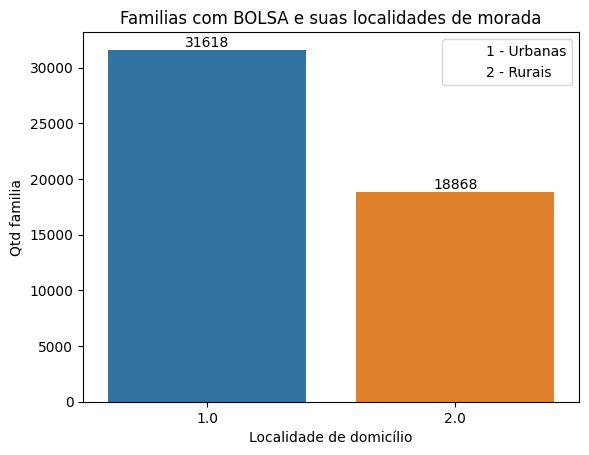

In [14]:
# Familias com bolsa x Localidade de domicílio / 

datatb = data_bolsa.groupby("cod_local_domic_fam")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['cod_local_domic_fam','id_familia'])
datatb = datatb.sort_values(by='cod_local_domic_fam', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="cod_local_domic_fam",y="id_familia",errwidth=0)
bar.set(xlabel='Localidade de domicílio',ylabel='Qtd familia')
plt.title('Familias com BOLSA e suas localidades de morada')
plt.legend(('1 - Urbanas','2 - Rurais'))
bar.bar_label(bar.containers[0])



[Text(0, 0, '1393'),
 Text(0, 0, '26096'),
 Text(0, 0, '55'),
 Text(0, 0, '48'),
 Text(0, 0, '20212'),
 Text(0, 0, '15'),
 Text(0, 0, '70')]

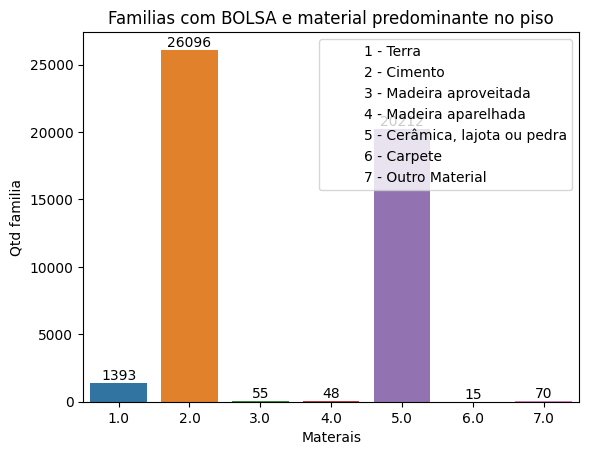

In [15]:
# Familias com bolsa x Material do piso / 

datatb = data_bolsa.groupby("cod_material_piso_fam")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['cod_material_piso_fam','id_familia'])
datatb = datatb.sort_values(by='cod_material_piso_fam', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="cod_material_piso_fam",y="id_familia",errwidth=0)
bar.set(xlabel='Materais',ylabel='Qtd familia')
plt.title('Familias com BOLSA e material predominante no piso')
plt.legend(('1 - Terra',
'2 - Cimento',
'3 - Madeira aproveitada',
'4 - Madeira aparelhada',
'5 - Cerâmica, lajota ou pedra',
'6 - Carpete',
'7 - Outro Material'
))
bar.bar_label(bar.containers[0])



[Text(0, 0, '37044'),
 Text(0, 0, '9382'),
 Text(0, 0, '54'),
 Text(0, 0, '542'),
 Text(0, 0, '559'),
 Text(0, 0, '87'),
 Text(0, 0, '9'),
 Text(0, 0, '212')]

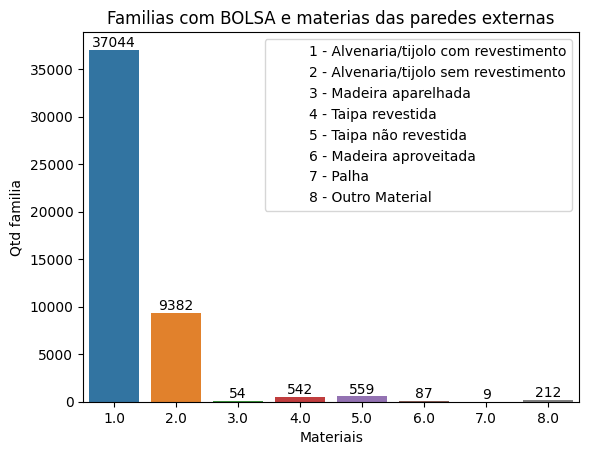

In [16]:
# Familias com bolsa x Material predominante nas paredes externas do domicílio / 

datatb = data_bolsa.groupby("cod_material_domic_fam")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['cod_material_domic_fam','id_familia'])
datatb = datatb.sort_values(by='cod_material_domic_fam', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="cod_material_domic_fam",y="id_familia",errwidth=0)
bar.set(xlabel='Materiais',ylabel='Qtd familia')
plt.title('Familias com BOLSA e materias das paredes externas')
plt.legend(('1 - Alvenaria/tijolo com revestimento',
'2 - Alvenaria/tijolo sem revestimento',
'3 - Madeira aparelhada',
'4 - Taipa revestida',
'5 - Taipa não revestida',
'6 - Madeira aproveitada',
'7 - Palha',
'8 - Outro Material'))
bar.bar_label(bar.containers[0])



[Text(0, 0, '45722'), Text(0, 0, '2167')]

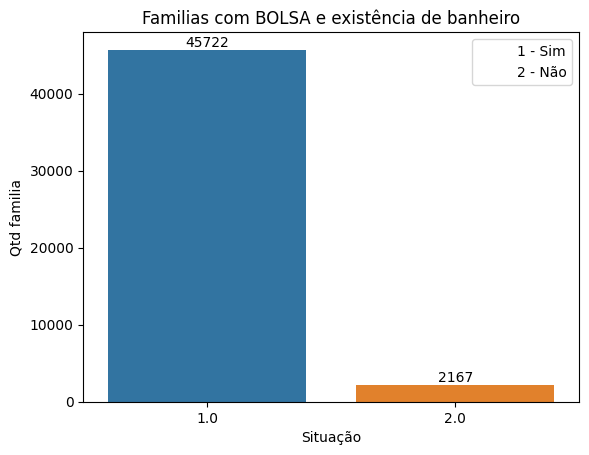

In [17]:
# Familias com bolsa x Localidade de domicílio / 

datatb = data_bolsa.groupby("cod_banheiro_domic_fam")['id_familia'].count()
datatb = convert_sums_frame(datatb, ['cod_banheiro_domic_fam','id_familia'])
datatb = datatb.sort_values(by='cod_banheiro_domic_fam', 
                      ascending=False )

bar = sns.barplot(data=datatb, x="cod_banheiro_domic_fam",y="id_familia",errwidth=0)
bar.set(xlabel='Situação',ylabel='Qtd familia')
plt.title('Familias com BOLSA e existência de banheiro')
plt.legend(('1 - Sim','2 - Não'))
bar.bar_label(bar.containers[0])



In [18]:
#Falta usar

# qtd_pessoas
# cod_abaste_agua_domic_fam
# cod_escoa_sanitario_domic_fam



### Pessoas
* datap - Data pesoas
* datapF - Data pessoas junto com famílias
* datapFB - Data pessoas junto com famílias com bolsa
* datapRB - Data pessoas junto com famílias Regulares na bolsa = Renda per capita menor igual R$170,00
* datapRB - Data pessoas junto com famílias Irregulares na bolsa = Renda per capita maior R$170,00

In [56]:
# Dados das pessoas
datap = pd.read_csv("../datasets/03_bolsa_familia/data_pessoas_sergipe.csv")
datapF = pd.merge(dataf,datap,on ='id_familia') # Familias e pessoas 
datapFB = pd.merge(data_bolsa,datap,on ='id_familia') #Familias e pessoas com bolsa
datapRB = datapF.query("vlr_renda_media_fam <= 170")
datapIRB = datapF.query("vlr_renda_media_fam > 170")


In [ ]:
datap.head()

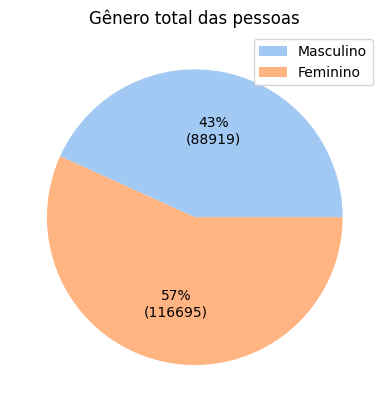

In [58]:
datap_pie = datapF.groupby("cod_sexo_pessoa")["id_familia"].count()
colors = sns.color_palette('pastel')[0:8]
#Grafico de pizza para representar o gráfico acima
plt.pie(datap_pie, colors = colors, autopct=lambda pct: func(pct, datap_pie))
plt.title('Gênero total das pessoas')
#plt.legend(datap_pie)
plt.legend(('Masculino','Feminino'))
plt.show()

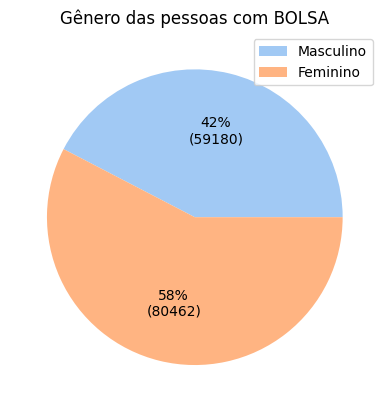

In [57]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.0f}%\n({:d})".format(pct, absolute)

datap_pie = datapFB.groupby("cod_sexo_pessoa")["id_familia"].count()
colors = sns.color_palette('pastel')[0:8]
#Grafico de pizza para representar o gráfico acima
plt.pie(datap_pie, colors = colors, autopct=lambda pct: func(pct, datap_pie))
plt.title('Gênero das pessoas com BOLSA')
#plt.legend(datap_pie)
plt.legend(('Masculino','Feminino'))
plt.show()